In [1]:
#importing libraries
# from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
#matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.info()
print('------------------------------')
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
------------------------------


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
catagorical_list = ['cut', 'color', 'clarity']
for i in catagorical_list:
    print(i, df[i].unique())
    print('.............................................')

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
.............................................
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
.............................................
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
.............................................


C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

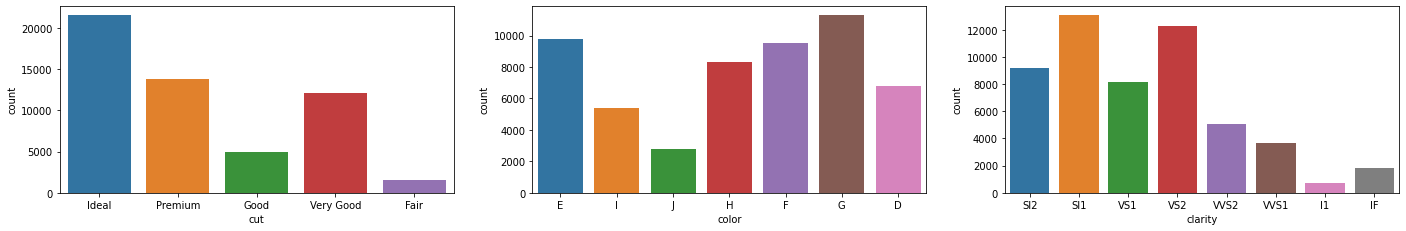

In [7]:
# ploting catagorical column
c=1
plt.figure(figsize= (24,24))
for i in catagorical_list:
    plt.subplot(6,3,c)
    sb.countplot(df[i])
    c=c+1
plt.show()

In [8]:
num_list = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
for i in num_list:
    print(i, df[i])
    print('.............................................')

carat 0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64
.............................................
depth 0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53935    60.8
53936    63.1
53937    62.8
53938    61.0
53939    62.2
Name: depth, Length: 53940, dtype: float64
.............................................
table 0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64
.............................................
price 0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64
.............................................
x 0   

C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FineComputers\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

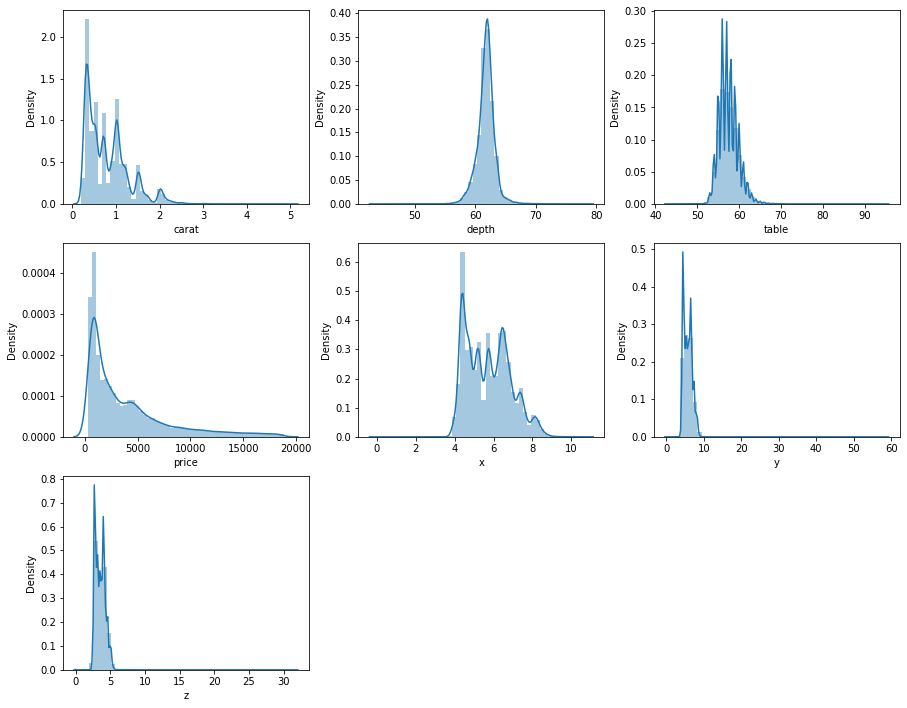

In [9]:
# ploting numerical column
c=1
plt.figure(figsize= (15,25))
for i in num_list:
    plt.subplot(6,3,c)
    sb.distplot(df[i])
    c=c+1
plt.show()

In [10]:
# incoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['cut'] = le.fit_transform(df['cut'] )
df['color'] = le.fit_transform(df['color'] )
df['clarity'] = le.fit_transform(df['clarity'] )

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


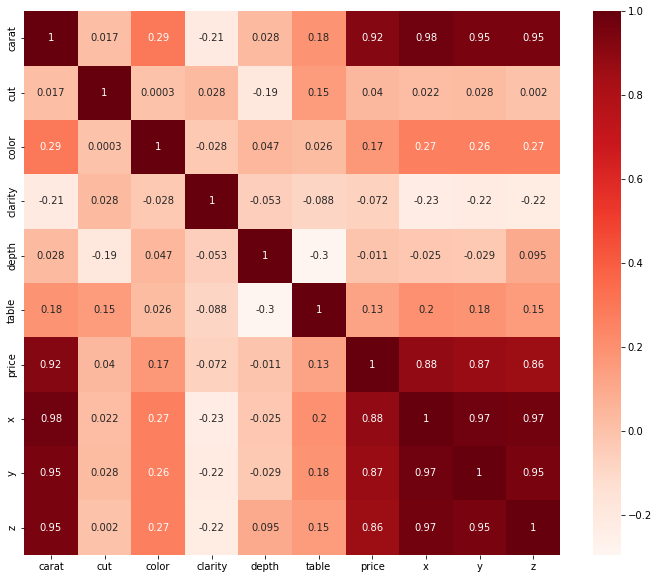

In [13]:
#Using Pearson Correlation # method-1
plt.figure(figsize=(12,10))
cor = df.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

carat    0.921591
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

In [15]:
# for dropping highily corelated features
print(df[["carat","x"]].corr())
print(df[["x","y"]].corr()) 
print(df[["y","z"]].corr())
print(df[["z","carat"]].corr())
print(df[["carat","y"]].corr())
print(df[["x","z"]].corr())

          carat         x
carat  1.000000  0.975094
x      0.975094  1.000000
          x         y
x  1.000000  0.974701
y  0.974701  1.000000
          y         z
y  1.000000  0.952006
z  0.952006  1.000000
              z     carat
z      1.000000  0.953387
carat  0.953387  1.000000
          carat         y
carat  1.000000  0.951722
y      0.951722  1.000000
          x         z
x  1.000000  0.970772
z  0.970772  1.000000


In [16]:
X = df[['carat', 'depth', 'table', 'x', 'y',
       'z']]
y1 = df['price']

In [17]:
#Adding constant column of ones, mandatory for sm.OLS model # method-2
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y1, X_1).fit()
model.pvalues

const     0.000000e+00
carat     0.000000e+00
depth    1.508901e-294
table    1.663814e-239
x        3.378404e-203
y         9.365715e-03
z         3.474378e-01
dtype: float64

In [18]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y1,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['carat', 'depth', 'table', 'x', 'y']


In [19]:
# ralevent and irrelivent feature # method-3
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y1)  
#Fitting the data to model
model.fit(X_rfe,y1)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False False]
[1 1 2 1 3 4]


In [20]:
# #no of features #method-5
# nof_list=np.arange(1,2)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
#     X_train, X_test, y_train, y_test = train_test_split(X,y1, test_size = 0.3, random_state = 0)
#     model = LinearRegression()
#     rfe = RFE(model,nof_list[n])
#     X_train_rfe = rfe.fit_transform(X_train,y_train)
#     X_test_rfe = rfe.transform(X_test)
#     model.fit(X_train_rfe,y_train)
#     score = model.score(X_test_rfe,y_test)
#     score_list.append(score)
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))

In [21]:
X1 = df[['carat', 'depth', 'table', 'x', 'y']]
y1 = df['price']

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [23]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dt = DecisionTreeRegressor()

In [35]:
# model loop

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(pred)
test_score = r2_score(y_test, pred)
train_score = r2_score(y_train, lr.predict(X_train))
if abs(train_score-test_score) <= 0.9:
    print(lr)
    print('R2 score is', r2_score(y_test, pred))
    print('Mean Absolute Error is', mean_absolute_error(y_test, pred))
    print('Mean Sruared Error is', mean_squared_error(y_test, pred))
    print('----------------------------------')


[ 201.52228019 2361.21621348 1052.07213233 ...  600.72826781 7400.30849987
 5691.24815229]
LinearRegression()
R2 score is 0.8589622698362709
Mean Absolute Error is 888.3497372019731
Mean Sruared Error is 2242051.6143037346
----------------------------------


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)
test_score = r2_score(y_test, pred)
train_score = r2_score(y_train, knn.predict(X_train))
if abs(train_score-test_score) <= 0.9:
    print(knn)
    print('R2 score is', r2_score(y_test, pred))
    print('Mean Absolute Error is', mean_absolute_error(y_test, pred))
    print('Mean Sruared Error is', mean_squared_error(y_test, pred))
    print('----------------------------------')

KNeighborsRegressor()
R2 score is 0.8686459246650273
Mean Absolute Error is 814.6018724508714
Mean Sruared Error is 2088112.282495365
----------------------------------


In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# svr.fit(X_train, y_train)
# pred = svr.predict(X_test)
# test_score = r2_score(y_test, pred)
# train_score = r2_score(y_train, svr.predict(X_train))
# if abs(train_score-test_score) <= 0.9:
#     print(svr)
#     print('R2 score is', r2_score(y_test, pred))
#     print('Mean Absolute Error is', mean_absolute_error(y_test, pred))
#     print('Mean Sruared Error is', mean_squared_error(y_test, pred))
#     print('----------------------------------')

In [33]:
res = pd.DataFrame(pred)
res.index = X_test.index
res.columns = ['prediction']
res.to_csv('predicted_results.csv')

array([ 201.52228019, 2361.21621348, 1052.07213233, ...,  600.72826781,
       7400.30849987, 5691.24815229])